* [EDA](#eda)
* [–ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤](#feature)
* [–ú–æ–¥–µ–ª—å —Ä–µ–≥—Ä–µ—Å—Å–∏–∏](#regress)
* [–û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏](#grade)
* [–ó–Ω–∞—á–∏–º–æ—Å—Ç—å —É—Ä–∞–≤–Ω–µ–Ω–∏—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏](#significance)
* [–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞](#stat)
* [–í—ã–≤–æ–¥](#itog)

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
pd.options.display.max_columns = 100

In [2]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage. (—É–º–µ–Ω—å—à–∞–µ–º –æ–±—ä–µ–º –ø–∞–º—è—Ç–∏, –∫–æ—Ç–æ—Ä—ã–π –∑–∞–Ω–∏–º–∞–µ—Ç –¥–∞—Ç–∞—Å–µ—Ç)       
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [3]:
matplotlib.rcParams.update({'font.size': 8})  # —Ä–∞–∑–º–µ—Ä —à—Ä–∏—Ñ—Ç–∞ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–∞—Ö

In [4]:
df = pd.read_csv('BankChurners.csv', encoding='cp1251', sep=',')

**EDA** - Exploratory Data Analysis<a class='anchor' id='eda'>

**–û–ø–∏—Å–∞–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞**\
\
–ë–∞–∑–∞ –¥–∞–Ω–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ –æ–¥–Ω–æ–≥–æ –∏–∑ –ï–≤—Ä–æ–ø–µ–π—Å–∫–∏—Ö –±–∞–Ω–∫–æ–≤ –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω—ã–º –∫–∞—Ä—Ç–∞–º –Ω–∞ 19.11.2020 –≥.
* **CLIENTNUM** - ID –∫–ª–∏–µ–Ω—Ç–∞
* **Attrition_Flag** - –ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è –≤–Ω—É—Ç—Ä–µ–Ω–Ω–µ–≥–æ —Å–æ–±—ã—Ç–∏—è (–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –∫–ª–∏–µ–Ω—Ç–∞) - –µ—Å–ª–∏ —Å—á–µ—Ç –∑–∞–∫—Ä—ã—Ç, —Ç–æ 1 –∏–Ω–∞—á–µ 0
* **Customer_Age** - –≤–æ–∑—Ä–∞—Å—Ç
* **Dependent_count** - –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∂–¥–∏–≤–µ–Ω—Ü–µ–≤
* **Education_Level** - –î–µ–º–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è - –û–±—Ä–∞–∑–æ–≤–∞—Ç–µ–ª—å–Ω–∞—è –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏—è –≤–ª–∞–¥–µ–ª—å—Ü–∞ —Å—á–µ—Ç–∞
* **Marital_Status** - –î–µ–º–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è - –ñ–µ–Ω–∞—Ç, –•–æ–ª–æ—Å—Ç, –†–∞–∑–≤–µ–¥–µ–Ω, –ù–µ–∏–∑–≤–µ—Å—Ç–µ–Ω
* **Income_Category** - –î–µ–º–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è - –ì–æ–¥–æ–≤–∞—è –∫–∞—Ç–µ–≥–æ—Ä–∏—è –¥–æ—Ö–æ–¥–∞ –≤–ª–∞–¥–µ–ª—å—Ü–∞ —Å—á–µ—Ç–∞ (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >)
* **Card_Category** - –ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è –ø—Ä–æ–¥—É–∫—Ç–∞ - –¢–∏–ø –∫–∞—Ä—Ç—ã (—Å–∏–Ω–∏–π, —Å–µ—Ä–µ–±—Ä–∏—Å—Ç—ã–π, –∑–æ–ª–æ—Ç–æ–π, –ø–ª–∞—Ç–∏–Ω–æ–≤—ã–π)
* **Months_on_book** - –ü–µ—Ä–∏–æ–¥ –≤–∑–∞–∏–º–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–π —Å –±–∞–Ω–∫–æ–º
* **Total_Relationship_Count** - –ö–æ–ª-–≤–æ –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã—Ö –ø—Ä–æ–¥—É–∫—Ç–æ–≤
* **Months_Inactive_12_mon** - –Ω–µ–∞–∫—Ç–∏–≤–Ω—ã—Ö –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 12 –º–µ—Å—è—Ü–µ–≤
* **Contacts_Count_12_mon** - –ö–æ–Ω—Ç–∞–∫—Ç–æ–≤ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 12 –º–µ—Å—è—Ü–µ–≤
* **Credit_Limit** - –ö—Ä–µ–¥–∏—Ç–Ω—ã–π –ª–∏–º–∏—Ç –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∫–∞—Ä—Ç–µ
* **Total_Revolving_Bal** - –û–±—â–∏–π –≤–æ–∑–æ–±–Ω–æ–≤–ª—è–µ–º—ã–π –æ—Å—Ç–∞—Ç–æ–∫ –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∫–∞—Ä—Ç–µ
* **Avg_Open_To_Buy** - –û—Ç–∫—Ä—ã—Ç–∞—è –¥–ª—è –ø–æ–∫—É–ø–∫–∏ –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –ª–∏–Ω–∏—è (–≤ —Å—Ä–µ–¥–Ω–µ–º –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 12 –º–µ—Å—è—Ü–µ–≤)
* **Total_Amt_Chng_Q4_Q1** - –ò–∑–º–µ–Ω–µ–Ω–∏–µ —Å—É–º–º—ã —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏ (Q4 –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å Q1)
* **Total_Trans_Amt** - –û–±—â–∞—è —Å—É–º–º–∞ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏ (–∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 12 –º–µ—Å—è—Ü–µ–≤)
* **Total_Trans_Ct** - –û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π (–∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 12 –º–µ—Å—è—Ü–µ–≤)
* **Total_Ct_Chng_Q4_Q1** - –ò–∑–º–µ–Ω–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π (Q4 –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å Q1)
* **Avg_Utilization_Ratio** - –°—Ä–µ–¥–Ω–∏–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –∫–∞—Ä—Ç


In [5]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998

In [6]:
# —É–¥–∞–ª—è—é –Ω–µ –Ω—É–∂–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
df = df.drop(
    ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], 
    axis=1)
df = df.drop(
    ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
    axis=1)

–¢–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö –≤ –∫–æ–ª–æ–Ω–∫–∞—Ö:

In [7]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

–û—Å–Ω–æ–≤–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –ø–æ –¥–∞–Ω–Ω—ã–º:

In [8]:
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

–î–∞–Ω–Ω—ã–µ –≤ –≤—ã–±–æ—Ä–∫–µ –ø—Ä—Ö–æ–∂–∏ –Ω–∞ —Ä–µ–∞–ª—å–Ω—ã–µ, –≤—ã–±—Ä–æ—Å—ã –Ω–µ –Ω–∞–±–ª—é–¥–∞—é—Ç—Å—è

–ü—Ä–æ–≤–µ—Ä–∏–º –Ω—É–ª–µ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏, –µ—Å–ª–∏ —Ç–∞–∫–∏–µ –∏–º–µ—é—Ç—Å—è

In [9]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

–ù—É–ª–µ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–µ—Ç. –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –∫–∞–∂–¥–æ–≥–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è

array([[<AxesSubplot:title={'center':'CLIENTNUM'}>,
        <AxesSubplot:title={'center':'Customer_Age'}>,
        <AxesSubplot:title={'center':'Dependent_count'}>,
        <AxesSubplot:title={'center':'Months_on_book'}>],
       [<AxesSubplot:title={'center':'Total_Relationship_Count'}>,
        <AxesSubplot:title={'center':'Months_Inactive_12_mon'}>,
        <AxesSubplot:title={'center':'Contacts_Count_12_mon'}>,
        <AxesSubplot:title={'center':'Credit_Limit'}>],
       [<AxesSubplot:title={'center':'Total_Revolving_Bal'}>,
        <AxesSubplot:title={'center':'Avg_Open_To_Buy'}>,
        <AxesSubplot:title={'center':'Total_Amt_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Total_Trans_Amt'}>],
       [<AxesSubplot:title={'center':'Total_Trans_Ct'}>,
        <AxesSubplot:title={'center':'Total_Ct_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Avg_Utilization_Ratio'}>,
        <AxesSubplot:>]], dtype=object)

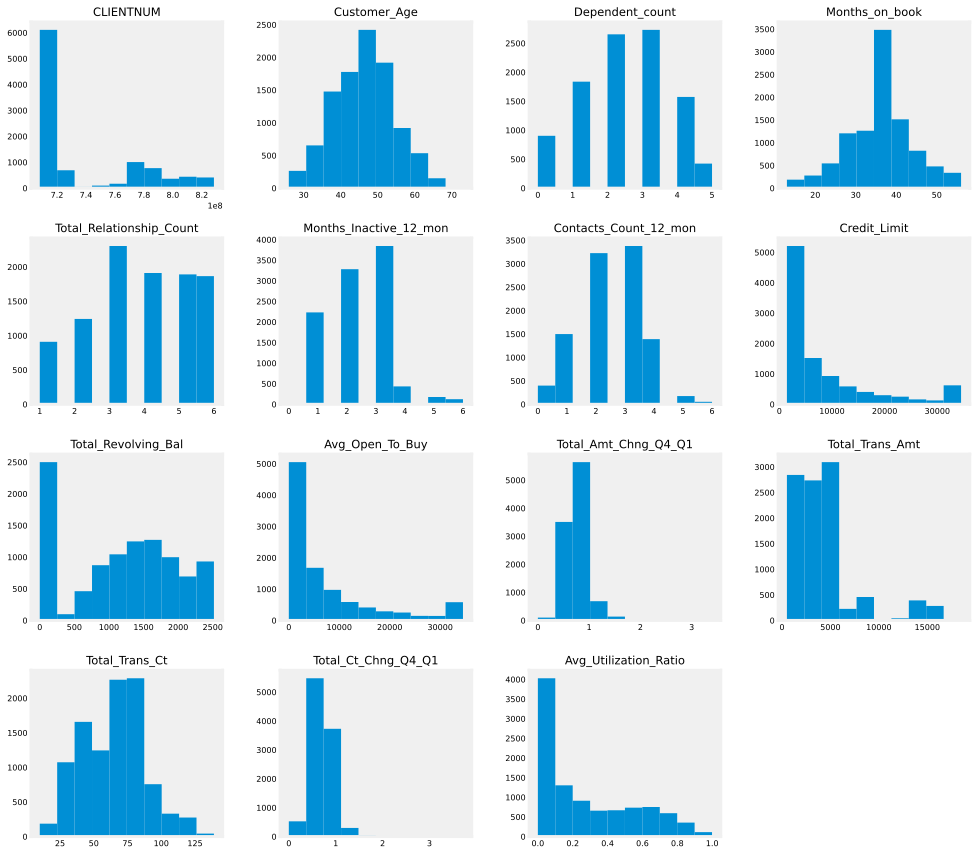

In [10]:
df.hist(figsize=(15,15), bins=10, grid=False)

–ü–æ –¥–∞–Ω–Ω—ã–º –≥—Ä–∞—Ñ–∏–∫–æ–≤, –º–æ–∂–µ–º —Å–¥–µ–ª–∞—Ç—å —Å–ª–µ–¥—É—é—â–∏–µ –≤—ã–≤–æ–¥—ã:
* –ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∑–∞–µ–º—â–∏–∫–æ–≤ –≤ –≤–æ–∑—Ä–∞—Å—Ç–µ 46 –ª–µ—Ç
* –í –æ—Å–Ω–æ–≤–Ω–æ–º —É –∑–∞–µ–º—â–∏–∫–æ–≤ 2-3 –∏–∂–¥–µ–≤–µ–Ω—Ü–∞
* –ø–æ 3 –∏ –±–æ–ª–µ–µ –ø—Ä–æ–¥—É–∫—Ç–∞ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –ø–æ–ª—å–∑—É—é—Ç—Å—è –∑–∞–µ–º—â–∏–∫–∏
* –ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∑–∞–µ–º—â–∏–∫–æ–≤ –≤ –±–∞–Ω–∫–µ –æ–±—Å–ª—É–∂–∏–≤–∞—é—Ç—Å—è 36 –º–µ—Å.
* –ë–æ–ª—å—à–æ–µ –∫–æ–ª-–≤–æ –∑–∞–µ–º—â–∏–∫–æ–≤ –Ω–µ –ø–æ–ª—å—å–∑—É—é—Ç—Å—è –ø—Ä–æ–¥—É–∫—Ç–∞–º–∏ –≤ –æ–±—â–µ–π —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ –≤ —Ç–µ—á–µ–Ω–∏–∏ 3-—Ö –º–µ—Å—è—Ü–µ–≤ –Ω–∞ –ø—Ä–æ—Ç—è–∂–µ–Ω–∏–∏ –≥–æ–¥–∞.


In [11]:
df

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...     

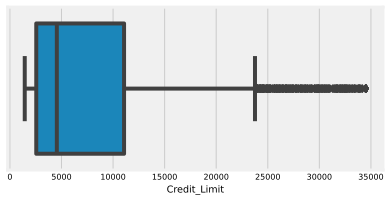

In [12]:
plt.figure(figsize=(6, 3))

sns.boxplot(df['Credit_Limit'], whis=1.5)

plt.xlabel('Credit_Limit')
plt.show()

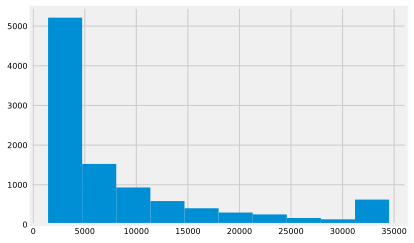

In [13]:
df['Credit_Limit'].hist();

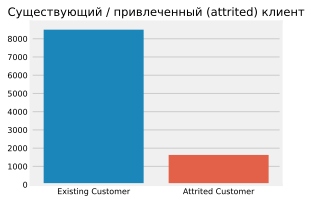

In [14]:
counts = df['Attrition_Flag'].value_counts()
    
plt.figure(figsize=(4,3))    
plt.title('–°—É—â–µ—Å—Ç–≤—É—é—â–∏–π / –ø—Ä–∏–≤–ª–µ—á–µ–Ω–Ω—ã–π (attrited) –∫–ª–∏–µ–Ω—Ç')
sns.barplot(counts.index, counts.values)
    
plt.show()

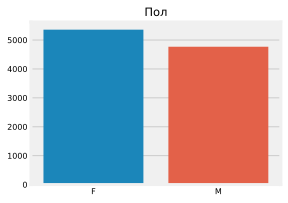

In [15]:
counts = df['Gender'].value_counts()
    
plt.figure(figsize=(4,3))    
plt.title('–ü–æ–ª')
sns.barplot(counts.index, counts.values)
    
plt.show()

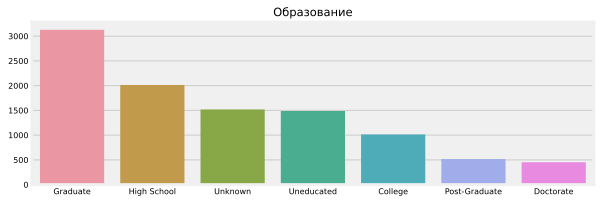

In [16]:
counts = df['Education_Level'].value_counts()
    
plt.figure(figsize=(9,3))    
plt.title('–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ')
sns.barplot(counts.index, counts.values)
    
plt.show()

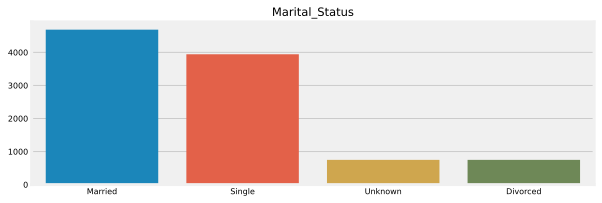

In [17]:
counts = df['Marital_Status'].value_counts()
    
plt.figure(figsize=(9,3))    
plt.title('Marital_Status')
sns.barplot(counts.index, counts.values)
    
plt.show()

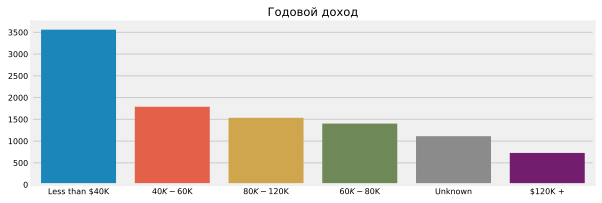

In [18]:
counts = df['Income_Category'].value_counts()
    
plt.figure(figsize=(9,3))    
plt.title('–ì–æ–¥–æ–≤–æ–π –¥–æ—Ö–æ–¥')
sns.barplot(counts.index, counts.values)
    
plt.show()

–ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –Ω–æ–≤—ã—Ö —Ñ–∏—á

In [19]:
df

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...     

### 2. –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤  <a class='anchor' id='feature'>

In [20]:
def salary_cat(X):

    X['salary_cat'] = 0

    X.loc[X['Income_Category'] == 'Unknown', 'salary_cat'] = 0  
    X.loc[X['Income_Category'] == 'Less than $40K', 'salary_cat'] = 1
    X.loc[X['Income_Category'] == '40ùêæ‚àí 60K', 'salary_cat'] = 2
    X.loc[X['Income_Category'] == '60ùêæ‚àí 80K', 'salary_cat'] = 3
    X.loc[X['Income_Category'] == '80ùêæ‚àí 120K', 'salary_cat'] = 4
    X.loc[X['Income_Category'] == '$120K +', 'salary_cat'] = 5
    
    return X

def status_cat(X):

    X['status_cat'] = 0

    X.loc[X['Marital_Status'] == 'Unknown', 'status_cat'] = 0  
    X.loc[X['Marital_Status'] == 'Single', 'status_cat'] = 1
    X.loc[X['Marital_Status'] == 'Married', 'status_cat'] = 2
    X.loc[X['Marital_Status'] == 'Divorced', 'status_cat'] = 3
    
    return X

def gender_cat(X):

    X['gender_cat'] = 0

    X.loc[X['Gender'] == 'F', 'gender_cat'] = 1  
    X.loc[X['Gender'] == 'M', 'gender_cat'] = 2
    
    return X

def education_cat(X):

    X['education_cat'] = 0

    X.loc[X['Education_Level'] == 'Unknown', 'education_cat'] = 0  
    X.loc[X['Education_Level'] == 'Uneducated', 'education_cat'] = 1
    X.loc[X['Education_Level'] == 'High School', 'education_cat'] = 2  
    X.loc[X['Education_Level'] == 'College', 'education_cat'] = 3
    X.loc[X['Education_Level'] == 'Graduate', 'education_cat'] = 4  
    X.loc[X['Education_Level'] == 'Post-Graduate', 'education_cat'] = 5
    X.loc[X['Education_Level'] == 'Doctorate', 'education_cat'] = 6
    
    return X

In [21]:
df = salary_cat(df)
df = status_cat(df)
df = gender_cat(df)
df = education_cat(df)

In [22]:
df

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...     

*–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –º–∞—Ç—Ä–∏—Ü—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π*

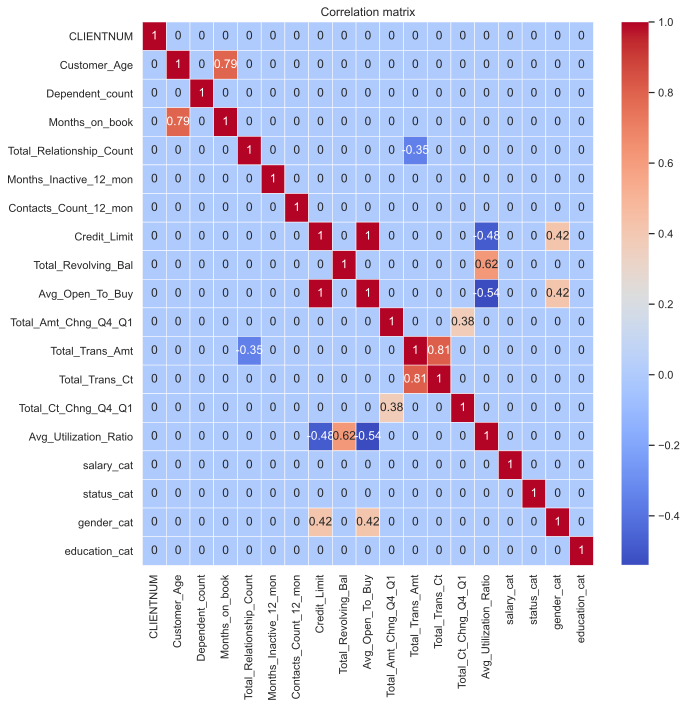

In [23]:
plt.figure(figsize = (9,10))

sns.set(font_scale=1)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

*–í–∏–¥–∏–º, —á—Ç–æ –≤–æ–∑—Ä–∞—Å—Ç –∑–∞–µ–º—â–∏–∫–∞ –∏ –ø–µ—Ä–∏–æ–¥ –≤–∑–∞–∏–º–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–π —Å –±–∞–Ω–∫–æ–º –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç –¥—Ä—É–≥ —Å –¥—Ä—É–≥–æ–º. –°—É–º–º–∞ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –∏ –∫–æ–ª–ª–∏—á–µ—Å—Ç–≤–æ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π —Ç–∞–∫–∂–µ –≤–ª–∏—è—é—Ç –¥—Ä—É–≥ –Ω–∞ –¥—Ä—É–≥–∞. –ò–Ω—Ç–µ—Ä–µ—Å–Ω–æ, —á—Ç–æ –∫—Ä–µ–¥–∏—Ç–Ω—ã–π –ª–∏–º–∏—Ç –∏ –ø–æ–ª –∑–∞–µ–º—â–∏–∫–∞ –≤–ª–∏—è—é—Ç –¥—Ä—É–≥ –Ω–∞ –¥—Ä—É–≥–∞*

* **CLIENTNUM** - ID –∫–ª–∏–µ–Ω—Ç–∞
* **Attrition_Flag** - –ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è –≤–Ω—É—Ç—Ä–µ–Ω–Ω–µ–≥–æ —Å–æ–±—ã—Ç–∏—è (–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –∫–ª–∏–µ–Ω—Ç–∞) - –µ—Å–ª–∏ —Å—á–µ—Ç –∑–∞–∫—Ä—ã—Ç, —Ç–æ 1 –∏–Ω–∞—á–µ 0
* **Customer_Age** - –≤–æ–∑—Ä–∞—Å—Ç
* **Dependent_count** - –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∂–¥–∏–≤–µ–Ω—Ü–µ–≤
* **Education_Level** - –î–µ–º–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è - –û–±—Ä–∞–∑–æ–≤–∞—Ç–µ–ª—å–Ω–∞—è –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏—è –≤–ª–∞–¥–µ–ª—å—Ü–∞ —Å—á–µ—Ç–∞
* **Marital_Status** - –î–µ–º–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è - –ñ–µ–Ω–∞—Ç, –•–æ–ª–æ—Å—Ç, –†–∞–∑–≤–µ–¥–µ–Ω, –ù–µ–∏–∑–≤–µ—Å—Ç–µ–Ω
* **Income_Category** - –î–µ–º–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è - –ì–æ–¥–æ–≤–∞—è –∫–∞—Ç–µ–≥–æ—Ä–∏—è –¥–æ—Ö–æ–¥–∞ –≤–ª–∞–¥–µ–ª—å—Ü–∞ —Å—á–µ—Ç–∞ (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >)
* **Card_Category** - –ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è –ø—Ä–æ–¥—É–∫—Ç–∞ - –¢–∏–ø –∫–∞—Ä—Ç—ã (—Å–∏–Ω–∏–π, —Å–µ—Ä–µ–±—Ä–∏—Å—Ç—ã–π, –∑–æ–ª–æ—Ç–æ–π, –ø–ª–∞—Ç–∏–Ω–æ–≤—ã–π)
* **Months_on_book** - –ü–µ—Ä–∏–æ–¥ –≤–∑–∞–∏–º–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–π —Å –±–∞–Ω–∫–æ–º
* **Total_Relationship_Count** - –ö–æ–ª-–≤–æ –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã—Ö –ø—Ä–æ–¥—É–∫—Ç–æ–≤
* **Months_Inactive_12_mon** - –Ω–µ–∞–∫—Ç–∏–≤–Ω—ã—Ö –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 12 –º–µ—Å—è—Ü–µ–≤
* **Contacts_Count_12_mon** - –ö–æ–Ω—Ç–∞–∫—Ç–æ–≤ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 12 –º–µ—Å—è—Ü–µ–≤
* **Credit_Limit** - –ö—Ä–µ–¥–∏—Ç–Ω—ã–π –ª–∏–º–∏—Ç –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∫–∞—Ä—Ç–µ
* **Total_Revolving_Bal** - –û–±—â–∏–π –≤–æ–∑–æ–±–Ω–æ–≤–ª—è–µ–º—ã–π –æ—Å—Ç–∞—Ç–æ–∫ –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∫–∞—Ä—Ç–µ
* **Avg_Open_To_Buy** - –û—Ç–∫—Ä—ã—Ç–∞—è –¥–ª—è –ø–æ–∫—É–ø–∫–∏ –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –ª–∏–Ω–∏—è (–≤ —Å—Ä–µ–¥–Ω–µ–º –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 12 –º–µ—Å—è—Ü–µ–≤)
* **Total_Amt_Chng_Q4_Q1** - –ò–∑–º–µ–Ω–µ–Ω–∏–µ —Å—É–º–º—ã —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏ (Q4 –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å Q1)
* **Total_Trans_Amt** - –û–±—â–∞—è —Å—É–º–º–∞ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏ (–∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 12 –º–µ—Å—è—Ü–µ–≤)
* **Total_Trans_Ct** - –û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π (–∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 12 –º–µ—Å—è—Ü–µ–≤)
* **Total_Ct_Chng_Q4_Q1** - –ò–∑–º–µ–Ω–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π (Q4 –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å Q1)
* **Avg_Utilization_Ratio** - –°—Ä–µ–¥–Ω–∏–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –∫–∞—Ä—Ç


### 3. –ú–æ–¥–µ–ª—å —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ <a class='anchor' id='regress'>

*–ü–æ—Å—Ç—Ä–æ–∏–º –º–æ–¥–µ–ª—å —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, –∫–æ—Ç–æ—Ä–∞—è –±—É–¥–µ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å –æ—Å—Ç–∞—Ç–æ–∫ –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∫–∞—Ä—Ç–µ –ø–æ –µ–≥–æ —Å—É–º–º–µ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –∑–∞ –ø–æ—Å–ª–¥–µ–Ω–∏–µ 12 –º–µ—Å. –∏ –ø–æ  –û—Ç–∫—Ä—ã—Ç–æ–π –¥–ª—è –ø–æ–∫—É–ø–∫–∏ –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –ª–∏–Ω–∏–π (–≤ —Å—Ä–µ–¥–Ω–µ–º –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 12 –º–µ—Å—è—Ü–µ–≤)*

In [24]:
y = df['Total_Revolving_Bal'].values
X = df[['Total_Trans_Amt', 'Avg_Open_To_Buy']].values 

In [25]:
y.shape, X.shape

((10127,), (10127, 2))

*–î–æ–±–∞–≤–∏–º –∫ –º–∞—Ç—Ä–∏—Ü–µ —Å—Ç–æ–ª–±–µ—Ü –∏–∑ 1*

In [26]:
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))
X.shape

(10127, 3)

*–ó–∞–ø–∏—à–µ–º –º–∞—Ç—Ä–∏—Ü—É $–•^—Ç–•$ –∏ –ø–æ—Å—á–∏—Ç–∞–µ–º –µ–µ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç–µ–ª—å*

In [27]:
XTX = X.T.dot(X)
np.linalg.det(XTX)

9.63052647205308e+26

*–æ–ø—Ä–µ–¥–µ–ª–∏—Ç–µ–ª—å –æ—á–µ–Ω—å –¥–∞–ª–µ–∫ –æ—Ç –Ω—É–ª—è, –∑–Ω–∞—á–∏—Ç –æ–±—Ä–∞—Ç–∞—è –º–∞—Ç—Ä–∏—Ü–∞ –Ω–µ –±—É–¥–µ—Ç —Å—Ç–µ–º–∏—Ç—å—Å—è –∫ –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ—Å—Ç–∏, –∑–Ω–∞—á–∏—Ç —Ñ–æ—Ä–º—É–ª–∞ –æ—Ç—Ä–∞–±–æ—Ç–∞–µ—Ç —Ö–æ—Ä–æ—à–æ*

*–Ω–∞–π–¥–µ–º –æ–±—Ä–∞—Ç–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É*

In [28]:
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(X.T).dot(y)
b

array([ 1.12420671e+03,  1.78106409e-02, -5.33290982e-03])

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression().fit(X, y)
model.intercept_, model.coef_

(1124.2067097572428, array([ 0.        ,  0.01781064, -0.00533291]))

*–º–æ–¥–µ–ª—å —Ä–µ–≥—Ä–µ—Å–∏–∏ –∏–º–µ–µ—Ç —Å–ª–µ–¥—É—é—â–∏–π –≤–∏–¥: $y = 1124 + 0.017 * x1 - 0.0053 * x2$*

*–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –æ—Å—Ç–∞—Ç–æ–∫ –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∫–∞—Ä—Ç–µ —É–≤–µ–ª–∏—á–∏—Ç—Å—è –Ω–∞ 0,017 –¥–æ–ª–ª–∞—Ä–æ–≤, –µ—Å–ª–∏ –û–±—â–∞—è —Å—É–º–º–∞ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏ —É–≤–µ–ª–∏—á–∏—Ç—Å—è –Ω–∞ –µ–¥–∏–Ω–∏—Ü—É, –∞ –ø—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ –û—Ç–∫—Ä—ã—Ç–æ–π –¥–ª—è –ø–æ–∫—É–ø–∫–∏ –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –ª–∏–Ω–∏–∏ –Ω–∞ 1 –¥–æ–ª–ª–∞—Ä –æ—Å—Ç–∞—Ç–æ–∫ –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∫–∞—Ä—Ç–µ —É–º–µ–Ω—å—à–∏—Ç—Å—è –Ω–∞ 0,0053 $*

#### 4. –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏<a class='anchor' id='grade'>

*–ü—Ä–æ–∏–∑–≤–µ–¥–µ–º –æ—Ü–µ–Ω–∫—É –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏*

In [31]:
def sum_of_squares(x):
    return((x - x.mean())**2).sum()

In [32]:
z = X.dot(b)
R_2 = 1 - ((y - z)**2).sum() / sum_of_squares(X)
R_2

0.9946132777171913

#### 5. –ó–Ω–∞—á–∏–º–æ—Å—Ç—å —É—Ä–∞–≤–Ω–µ–Ω–∏—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏<a class='anchor' id='significance'>

*–ü—Ä–æ–≤–µ—Ä–∏–º –∑–Ω–∞—á–∏–º–æ—Å—Ç—å —É—Ä–∞–≤–Ω–µ–Ω–∏—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏. –ë—É–¥—É –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å F-—Ç–µ—Å—Ç –§–∏—à–µ—Ä–∞, –∫–æ—Ç–æ—Ä—ã–π –ø—Ä–æ–≤–µ—Ä—è–µ—Ç –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –æ –Ω–µ–∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ R_2*

In [33]:
n = X.shape[0]
m = X.shape[1] - 1
k1 = m
k2 = n - m - 1
k1, k2

(2, 10124)

In [34]:
alpha = 0.05
t = stats.f.ppf(1-alpha, k1, k2)
t

2.996618897662762

*–ö—Ä–∏—Ç–∏—á–µ—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å –æ—Ç 2,99 –¥–æ –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ—Å—Ç–∏. –ù–∞–π–¥–µ–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É*

#### 6. –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞<a class='anchor' id='stat'>

In [35]:
F = (R_2 / k1) / ((1- R_2) / k2)
F

934656.0203915463

#### 7. –í—ã–≤–æ–¥<a class='anchor' id='itog'>

*–ó–Ω–∞—á–µ–Ω–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –ø–æ–ø–∞–ª–æ –≤ –∫—Ä–∏—Ç–∏—á–µ—Å–∫—É—é –æ–±–ª–∞—Å—Ç—å, –∑–Ω–∞—á–∏—Ç –≥–∏–ø–æ—Ç–µ–∑–∞ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –Ω–∞—à–µ–≥–æ —É—Ä–∞–≤–Ω–µ–Ω–∏—è, –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ –æ–±—ä—è—Å–Ω—è–µ—Ç 99,46%. –≠—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –Ω–∞—à–∞ –º–æ–¥–µ–ª—å –∏–º–µ–µ—Ç —Ö–æ—Ä–æ—à—É—é –æ–±—ä—è—Å–Ω—è—é—â—É—é —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å.*